# Partie 1
## Questions
*1. Justifier pourquoi l’algorithme de la puissance itérée (vu en détails dans le TD de R2.09
dédiée à la SAE) permet de calculer le score de chacune des pages.*

L'algorithme de la puissance itérée permet de calculer le score de chacune des pages car cette fonction permet de calculer un vecteur propre de la matrice, et ce vecteur propre est utilisé afin de trouver le score de chaque page.

*2. Implémenter cet algorithme pour calculer le score de chacune des pages du graphe
précédent. On vérifiera (numériquement) que le vecteur de score obtenu est bien ap-
proximativement solution de r = Qr.*

Voici une implémentation Python de la fonction de puissance itérée:
La fonction prend en entrée une Matrice `M` et un seuil d'approximation `e` et retourne un vecteur propre `newX` pour cette matrice, une valeur propre `np.linalg.norm(np.dot(M, X))` et le nombre d'itérations effectués `n`.

In [1]:
import numpy as np

def puissance_iteree(M, e):
    X = np.array([np.random.randint(1, 10) for _ in range(len(M))])
    newX = X
    n = 1
    while 1:
        newX = (np.dot(M, X)) / np.linalg.norm(np.dot(M, X))
        if np.linalg.norm(newX - X) <= e: break
        X = newX
        n += 1
    return newX, np.linalg.norm(np.dot(M, X)), n

def calculQ(M):
    N = np.sum(M, axis=0)
    q = np.empty((M[0].size, M[0].size))
    for i in range(M[0].size):
        for j in range(M[0].size):
            if N[j] == 0:
                q[i][j] = 0
            else:
                q[i][j] = M[i][j] / N[j]
    return q
    
            

In [2]:
N = 14

# i = horizontal # j = vertical

matriceCPartie1 = np.array([
    #1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14
    [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], # 1
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 2
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 3
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 4
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 5
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # 6
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], # 7
    [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # 8
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], # 9
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1], # 10
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 11
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], # 12
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], # 13
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0], # 14
    ])

vecteurPropre, valeurPropre, iterations = puissance_iteree(matriceCPartie1, 10**(-6))

for index, elem in enumerate(vecteurPropre):
    print(f"Score Page {index+1}: {elem}")

Score Page 1: 0.3934718895126158
Score Page 2: 0.14987443193936104
Score Page 3: 0.20696198412437936
Score Page 4: 0.22870677963371375
Score Page 5: 0.2940769810828727
Score Page 6: 0.40267256064222784
Score Page 7: 0.1533788253946222
Score Page 8: 0.27022345986345
Score Page 9: 0.1533788253946222
Score Page 10: 0.3934596436745842
Score Page 11: 0.14986944440954636
Score Page 12: 0.2069549652551343
Score Page 13: 0.22869893343309727
Score Page 14: 0.2940667665842714


Afin de vérifier que le calcul est correct, on vérifie `r = Qr`
Pour que cette formule sois vrai, il faut que Q soit 1.
On calcul donc la valeur propre de Q:

In [3]:
print(f"Valeur propre de Q pour matrice: {puissance_iteree(calculQ(matriceCPartie1), 10**(-8))[1]}")

Valeur propre de Q pour matrice: 0.9999999999999991


On remarque que la valeur propre de Q est bien égal à 1, donc, `r = Qr`.

*3. Analyser la pertinence du résultat obtenu.*

Le résultat signifie que la page qui sera tout en haut du moteur de recherche sera la page 6, puisqu'elle a le score le plus important. En revanche, les pages 2 et 11 seront les plus basses, puisqu'elles sont les moins importantes.

# Partie 2

In [4]:
N = 5

matriceCPartie2 = np.array([
    [0, 1, 1, 1, 1],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
    ])

#vecteurPropre, valeurPropre, iterations = puissance_iteree(matriceCPartie2, 10**(-6))
    
#for index, elem in enumerate(vecteurPropre):
#    print(f"Score Page {index+1}: {elem}")

On se rend compte que pour les pages ne se faisant *pointé par aucune autre page*, l'algorithme tente de *diviser par 0*. Pour régler cela, on instaure une **matrice de transition** avec un **facteur d'amortissement**.

In [5]:
def calculP(M, N, a):
    P = np.empty((N, N))
    Nj = np.sum(M, axis=0)
    Q = calculQ(M)
    for i in range(N):
        for j in range(N):
            if Nj[j] == 0:
                P[i][j] = 1/N
            else:
                P[i][j] = a * Q[i][j] + (1 - a) / N
    return P

vecteurPropre, valeurPropre, iterations = puissance_iteree(calculP(matriceCPartie2, N, 0.85), 10**(-6))

for index, elem in enumerate(vecteurPropre):
    print(f"Score Page {index+1}: {elem}")

Score Page 1: 0.8258223776229926
Score Page 2: 0.40102186310673504
Score Page 3: 0.1974869969560661
Score Page 4: 0.281418972342058
Score Page 5: 0.1974869969560661


On remarque que maintenant les scores sont bien calculé sans erreurs, et que la page 1, qu'on peut facilement déduire aura le plus haut score, puisque pointé par beaucoups de pages, a bien le plus haut score dans nos résultats. On vérifie maintenant que `r = Pr`, ou que `P` soit égal à 1.

In [6]:
print(f"Valeur propre de P pour matrice: {puissance_iteree(calculP(matriceCPartie1, N, 0.85), 10**(-8))[1]}")

Valeur propre de P pour matrice: 0.9337866271775539


On remarque que P est approximativement égal à 1, donc `r = Pr`.

# Partie 3

*1. Analyser l’influence du critère d’arrêt dans l’algorithme de la puissance itérée.*

Plus le seuil de précision augmente, plus on devrait avoir un résultat précis et plus on devrait avoir d'itérations. On vérifie cela grâce à une représentation graphique avec différent seuils de précisions. On regardera non seulement le nombre d'itérations, mais aussi la précision du résultat. On fera donc cela avec Q, puisque l'on sait que Q devrait valoir 1.

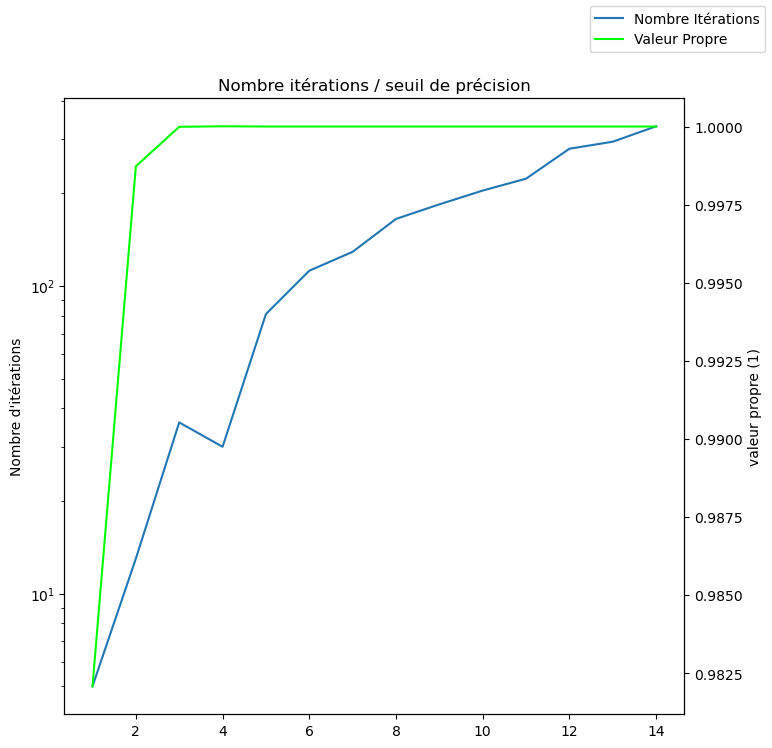

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

l = []
v = []
Q = calculQ(matriceCPartie1)
for x in range(1, 15):
    e = 10**(-x)
    puit = puissance_iteree(Q, e)
    l.append(puit[2])
    v.append(puit[1])
ax1.semilogy(range(1, 15), l)
plt.title("Nombre itérations / seuil de précision")
ax1.set_ylabel("Nombre d'itérations")
ax2.plot(range(1, 15), v, color="#00FF00")
ax2.set_ylabel("valeur propre (1)")
fig.legend(["Nombre Itérations", "Valeur Propre"])

plt.show()

Sur ce graphe, on remarque bien que le nombre d'itérations augmente, et que la valeur propre s'approche de 1, ce qui est le bon résultat. On remarque aussi que tout seuil de précision au delà de 10e-3 n'est pas nécessaire puisque dès 10e-3, la valeur propre vaut 1.

*2. Ajouter quelques hubs (pages qui ont beaucoup de liens sortant) et autorités (pages qui ont beaucoup de liens entrant). Commenter l’impact sur les scores.*

On a donc créé une nouvelle matrice à partir de la matrice de la *Partie 1*:
* 15: Autorité
* 16: Hub
* 17: Hub (aucun lien entrant)
* 18: Égal
* 19: Autorité (aucun lien sortant
* 20: Autorité
Voici la nouvelle matrice:

In [8]:
N = 20

matriceCPartie3 = np.array([
    #1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20
    [0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 1
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], # 2
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0], # 3
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0], # 4
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 5
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], # 6
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], # 7
    [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 8
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], # 9
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1], # 10
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 11
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], # 12
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1], # 13
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0], # 14
    [0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], # 15
    [0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], # 16
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], # 17
    [0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # 18
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], # 19
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], # 20
    ])

vecteurPropre, valeurPropre, iterations = puissance_iteree(calculP(matriceCPartie3, N, 0.85), 10**(-6))

for index, elem in enumerate(vecteurPropre):
    if index == 14:
        break
    print(f"Score Page {index+1}: {elem}")
print(f"Score Page 18: {vecteurPropre[17]}")

print("Autorités:")
for index in [14, 18, 19]:
    print(f"Score Page {index+1}: {vecteurPropre[index]}")

print("Hubs:")
for index in [15, 16]:
    print(f"Score Page {index+1}: {vecteurPropre[index]}")

Score Page 1: 0.17046796283795382
Score Page 2: 0.0905767207217499
Score Page 3: 0.16720082296969888
Score Page 4: 0.16677329789837217
Score Page 5: 0.10390865612004815
Score Page 6: 0.1266078448514786
Score Page 7: 0.06480913198611828
Score Page 8: 0.0870750498624244
Score Page 9: 0.08180083126222067
Score Page 10: 0.4061104683333593
Score Page 11: 0.07782039454315412
Score Page 12: 0.15719670421453077
Score Page 13: 0.3028441306496113
Score Page 14: 0.20009959075701142
Score Page 18: 0.13603535613763748
Autorités:
Score Page 15: 0.3752494621957086
Score Page 19: 0.13017288617609882
Score Page 20: 0.5553834192573011
Hubs:
Score Page 16: 0.21824628758236955
Score Page 17: 0.04330102311896261
